In [5]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("heart_2020_cleaned.csv")
features = data.columns
data.head(6)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No


In [7]:
data.shape

(319795, 18)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [9]:
for i in range(len(data.select_dtypes(include=['object']).columns.to_list())):
    print(data[data.select_dtypes(include=['object']).columns.to_list()[i]].value_counts(normalize = True, ascending = True).sort_index(), '\n')

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64 

No     0.587523
Yes    0.412477
Name: Smoking, dtype: float64 

No     0.931903
Yes    0.068097
Name: AlcoholDrinking, dtype: float64 

No     0.96226
Yes    0.03774
Name: Stroke, dtype: float64 

No     0.86113
Yes    0.13887
Name: DiffWalking, dtype: float64 

Female    0.524727
Male      0.475273
Name: Sex, dtype: float64 

18-24          0.065867
25-29          0.053018
30-34          0.058641
35-39          0.064260
40-44          0.065686
45-49          0.068141
50-54          0.079370
55-59          0.093050
60-64          0.105336
65-69          0.106790
70-74          0.097140
75-79          0.067174
80 or older    0.075527
Name: AgeCategory, dtype: float64 

American Indian/Alaskan Native    0.016267
Asian                             0.025229
Black                             0.071730
Hispanic                          0.085824
Other                             0.034172
White                             0.766

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [11]:
def change(col):
    if col=='Yes' or col=='Yes (during pregnancy)':
        return 1
    elif col=='No' or col=='No, borderline diabetes':
        return 0
    elif col=='Male':
        return 1
    elif col=='Female':
        return 0
data['Smoking'] = data['Smoking'].apply(change)
data['Sex'] = data['Sex'].apply(change)
data['AlcoholDrinking'] = data['AlcoholDrinking'].apply(change)
data['Stroke'] = data['Stroke'].apply(change)
data['DiffWalking'] = data['DiffWalking'].apply(change)
data['PhysicalActivity'] = data['PhysicalActivity'].apply(change)
data['Asthma'] = data['Asthma'].apply(change)
data['KidneyDisease'] = data['KidneyDisease'].apply(change)
data['SkinCancer'] = data['SkinCancer'].apply(change)
data['HeartDisease'] = data['HeartDisease'].apply(change)
data['Diabetic'] = data['Diabetic'].apply(change)

#get_dummies
# df2 = data.copy()
# genHealth = pd.get_dummies(df2['GenHealth'],prefix='GenHealth')
# ageCategory = pd.get_dummies(df2['AgeCategory'],prefix='AgeCategory')
# race = pd.get_dummies(df2['Race'],prefix='Race')
# sex = pd.get_dummies(df2['Sex'],prefix='Sex')
# diabetic = pd.get_dummies(df2['Diabetic'],prefix='Diabetic')

# df2 = pd.concat([df2,genHealth,ageCategory,race,sex,diabetic],axis=1)

# df2 = df2.drop(df2[['Race','AgeCategory','GenHealth','Sex','Diabetic']],axis=1)

# data = df2

# # data.info()

# age_cat = data[["AgeCategory"]].sort_values(by="AgeCategory")
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder(sparse=False)
# age_cat_encoder = onehot_encoder.fit_transform(age_cat)
# age_cat_encoder = pd.DataFrame(age_cat_encoder, columns=age_cat.AgeCategory.unique())
# age_cat_encoder = pd.merge(age_cat_encoder, df_cat_encoded["HeartDisease"],left_index=True, right_index=True)

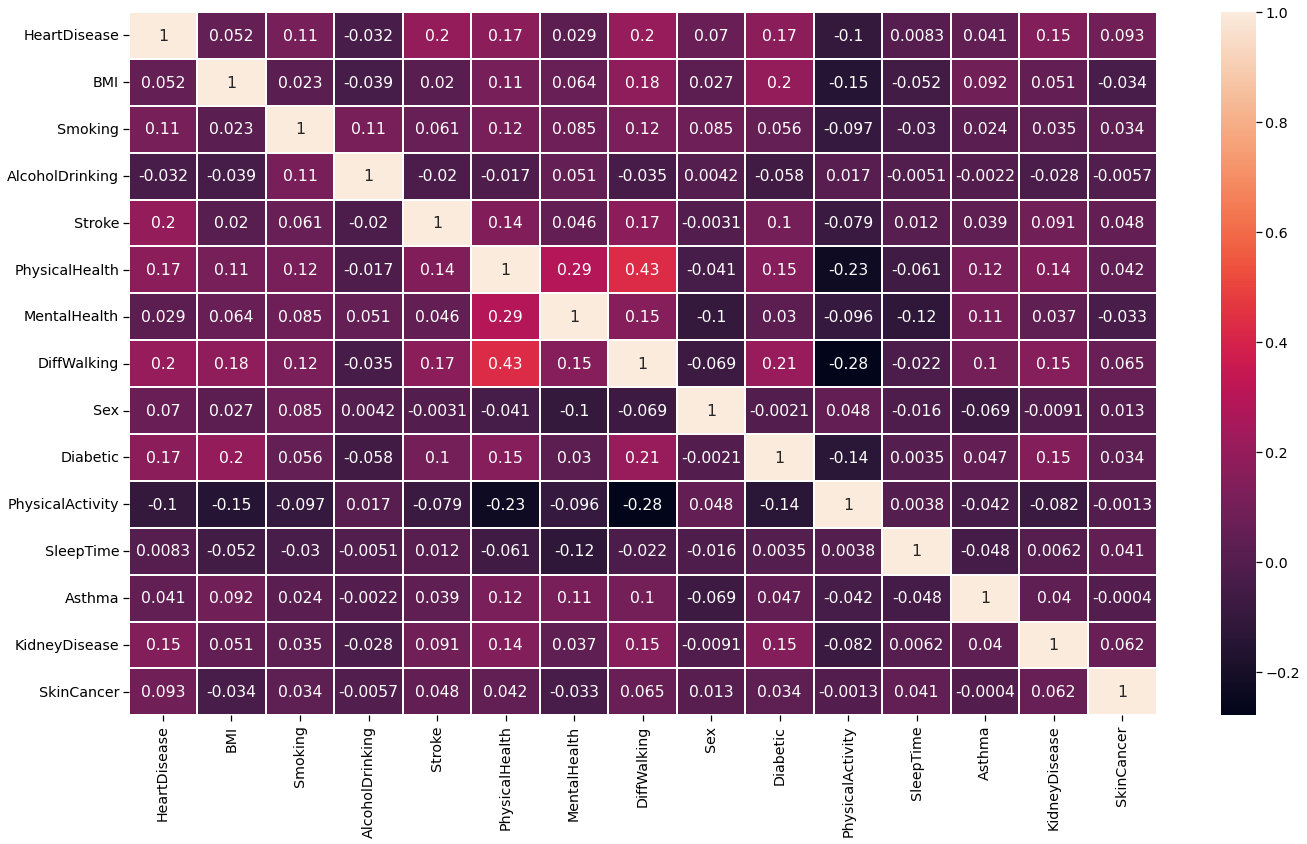

In [12]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth = 2)
plt.tight_layout()

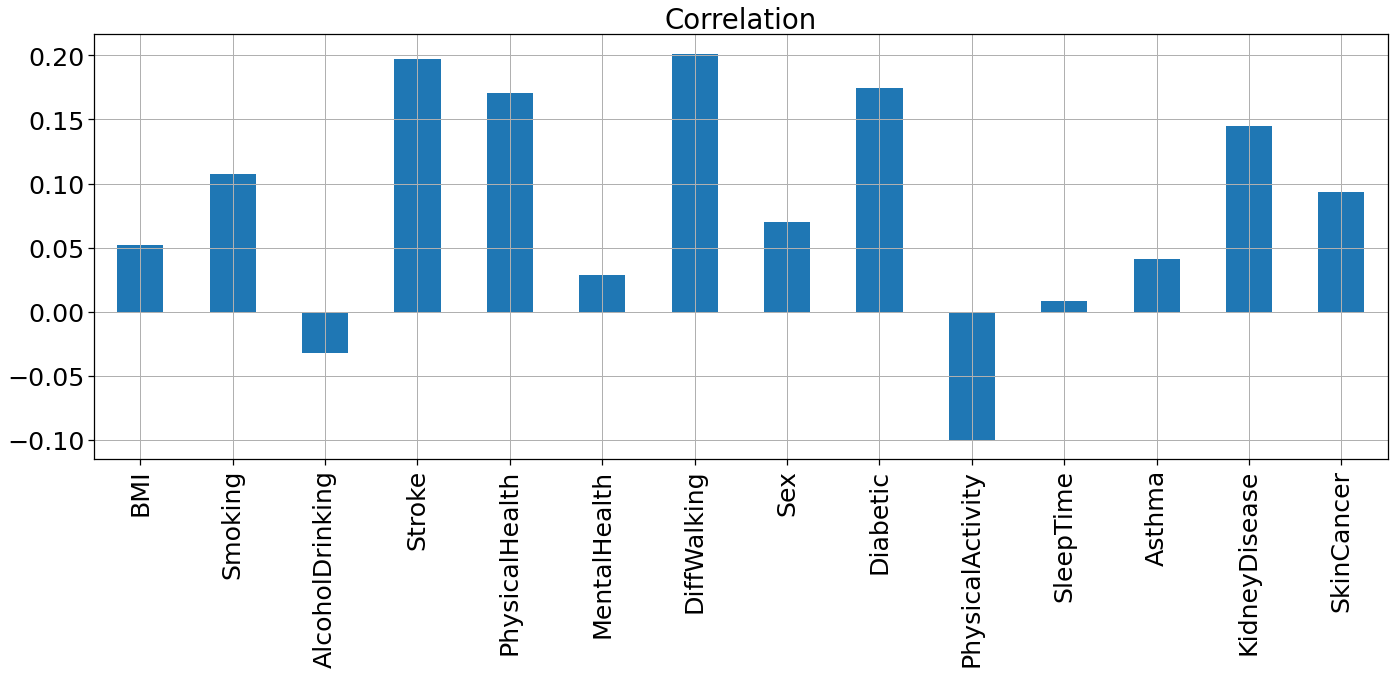

In [13]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('HeartDisease', axis=1).corrwith(data.HeartDisease).plot(kind='bar', grid=True, figsize=(20, 10), 
title="Correlation")
plt.tight_layout()

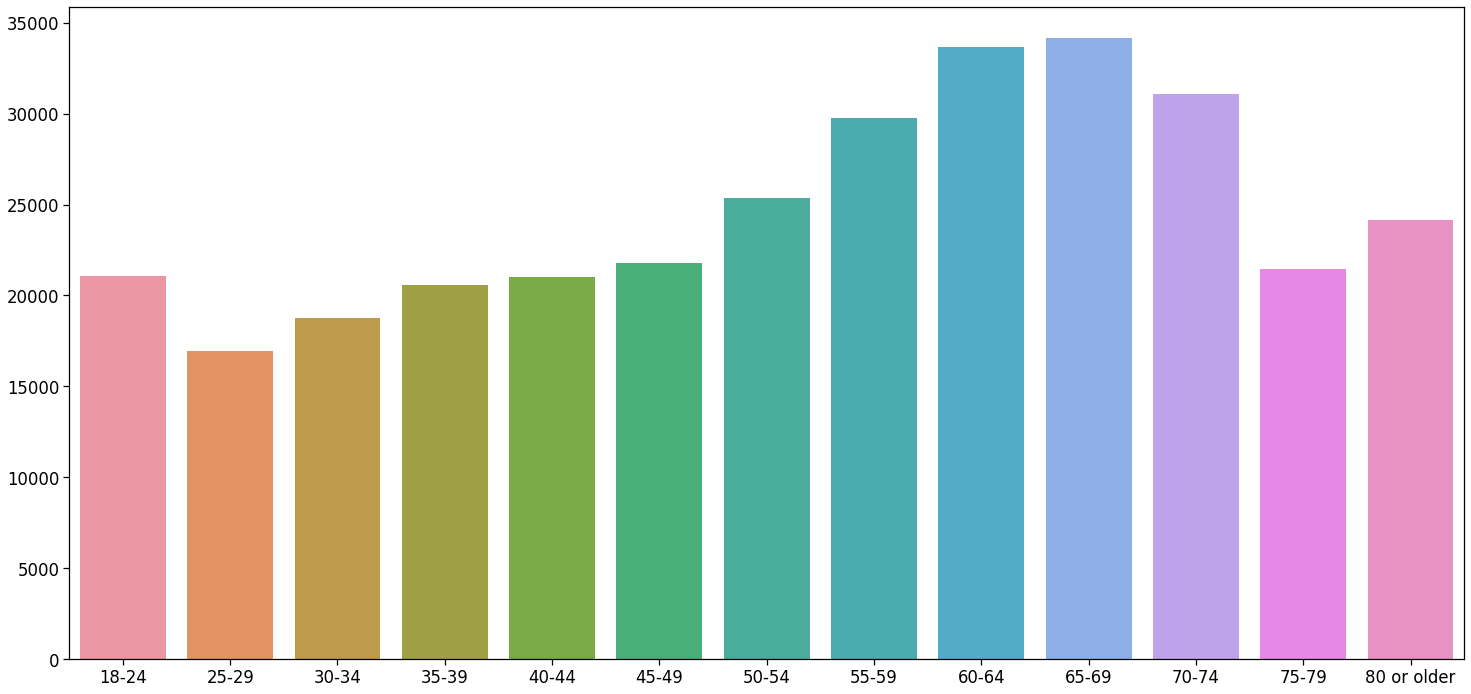

In [14]:
order = ['18-24','25-29', '30-34', '35-39','40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79', '80 or older']
data['AgeCategory'] = pd.Categorical(data['AgeCategory'], order )
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
ax = sns.barplot(x=data.AgeCategory.value_counts().index,y=data.AgeCategory.value_counts().values)
plt.show()

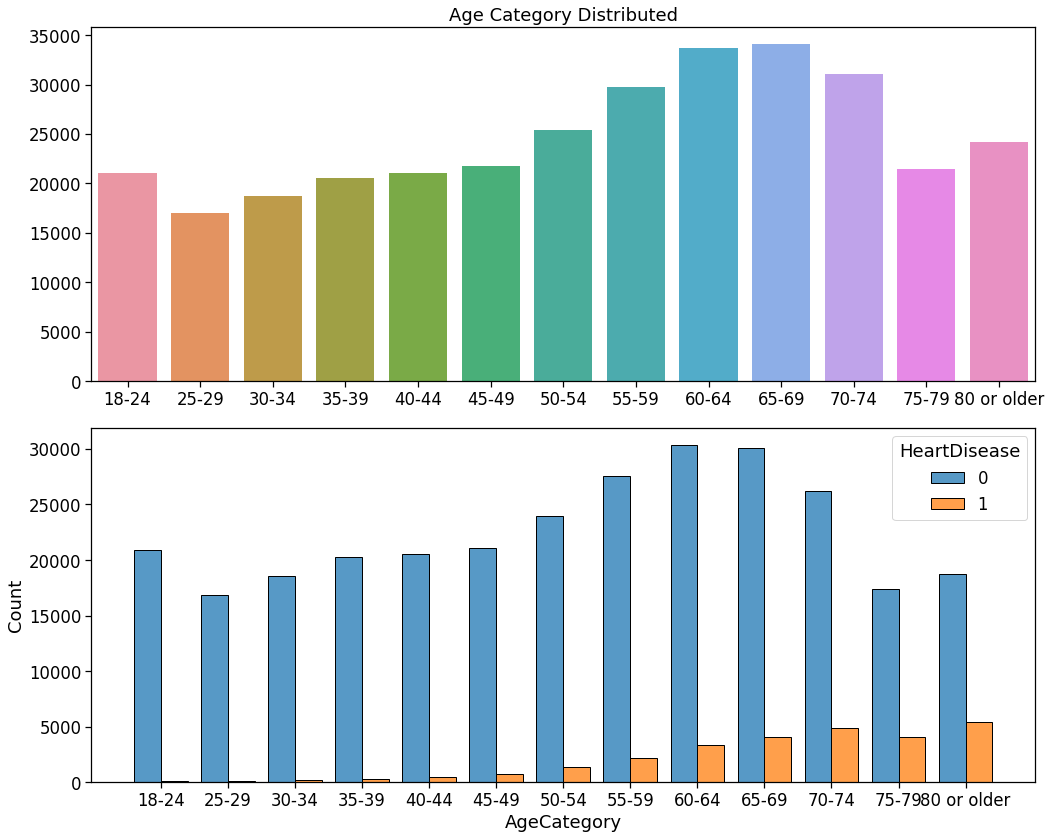

In [15]:
fig, axes = plt.subplots(2,1, figsize=(15,12))

i, r = pd.factorize(data["AgeCategory"])
a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
sns.barplot(ax=axes[0], x=data.AgeCategory.value_counts().index,y=data.AgeCategory.value_counts().values)
axes[0].set_title("Age Category Distributed")

sns.histplot(ax=axes[1], data=data, x="AgeCategory", hue="HeartDisease", multiple="dodge", shrink=.8)

fig.tight_layout()
plt.show()
#Test